<a href="https://colab.research.google.com/github/todnewman/projects/blob/master/AD_Plots_COLLINS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'My Drive'/projects/airworthiness/notebooks

Mounted at /content/drive
/content/drive/My Drive/projects/airworthiness/notebooks


## Read the CSV into a Pandas DataFrame



In [ ]:
df = pd.read_csv('EASA_collins.csv')

superseded_fil = df['Subject'].str.contains('SUPERSEDED', na=False)

df = df[~superseded_fil]
df = df[df['FAILURE_CLASS'].notna()]
#
# Do the below to line up failure colors across runs
#
data_files = df['FAILURE_CLASS'].unique()
colors = cm.rainbow(np.linspace(0,1,len(data_files)))
d2c = dict(zip(data_files, colors))

df.head()

,AD class,Class number,Issue Date,Subject,Approval Holder / Type Designation,Effective date,ATA Chapter,FILE,Manufacturer,Summary,KEY,PLATFORM_TYPE_label,PROBLEM_TYPE_label,ENG_TYPE_Label-new,PASSENGER_SERVICES,AIRFRAME,FLIGHT_SUPPORT,AIRFRAME_TYPES_label,FAILURE_CLASS,PRODUCT TYPE,RTX LEGACY BUSINESS,UTC,Thales,Honeywell
0,AD,2006-0265-CN,4/17/2013,CANCELLED: Navigation Systems - Mode C and S T...,APPLIANCES\n ATA 34 NAVIGATION,4/17/2013,34,AD_2006-0265-CN_1.pdf,"Various, see Applicability",Such transponders are known to have been manu...,2006-0265-CN,HELICOPTER,AIRFRAME,NaN,0.831650,0.583333,0.819444,FLIGHT_SUPPORT,AVIONICS_SENSORS,ATC TRANSPONDER,COLLINS,x,x,x
1,AD,2014-0103,5/6/2014,Navigation - Angle Of Attack Probe Conic Plate...,AIRBUS\n A330\n A340,5/20/2014,34,AD_2014-0103_1.pdf,Airbus (formerly Airbus Industrie),An A330 aeroplane experienced a blockage of a...,2014-0103,WIDE_BODY,AIRFRAME,NaN,0.818182,0.571715,0.798115,FLIGHT_SUPPORT,AVIONICS_SENSORS,AUTOPILOT,GOODRICH,x,x,NaN
2,AD,2015-0135R3,3/13/2018,Navigation - Angle of Attack Sensors - Replace...,AIRBUS\n A318\n A319\n A320\n A321,3/13/2018,34,AD_2015-0135R3_1.pdf,Airbus (formerly Airbus Industrie),An occurrence was reported where an Airbus A3...,2015-0135R3,NARROW_BODY,AIRFRAME,NaN,0.875000,0.583333,0.875000,FLIGHT_SUPPORT,AVIONICS_SENSORS,ANGLE OF ATTACK SENSORS,UTAS,x,x,NaN
3,AD,2015-0134,7/8/2015,Navigation - Angle of Attack Sensors - Replace...,AIRBUS\n A330\n A340,7/15/2015,34,AD_2015-0134_1.pdf,Airbus (formerly Airbus Industrie),"Airbus A330-201, A330-202, A330-203, A330-223...",2015-0134,WIDE_BODY,AIRFRAME,NaN,0.840909,0.583333,0.757052,FLIGHT_SUPPORT,AVIONICS_SENSORS,ANGLE OF ATTACK SENSORS,GOODRICH,x,x,NaN
4,AD,2009-0195,8/31/2009,Navigation - Airspeed Pitot Probes - Replacement,AIRBUS\n A330\n A340,9/7/2009,34,AD_2009-0195_1.pdf,Airbus (formerly Airbus Industrie),"Airbus A330-201, A330-202, A330-203, A330-223...",2009-0195,WIDE_BODY,AIRFRAME,NaN,0.703636,0.593750,0.875000,FLIGHT_SUPPORT,AVIONICS_SENSORS,PITOT PROBES,GOODRICH,x,x,NaN


## Some Plotting Libraries

In [ ]:
def plot_pie_from_dict(type_count, company, typ):
    # Data to plot
    labels = []
    sizes = []

    for x, y in type_count.items():
        if y > 5:
            labels.append(x)
            sizes.append(y)

    # Plot
    plt.pie(sizes, labels=labels)
    plt.title(f"{company} Engine Failure Types Classified as {typ}")
    plt.axis('equal')
    plt.show()

    
def plot_stackedbar_from_dict(big_dict, company, typ):
    # Data to plot
    
    df = pd.DataFrame(big_dict)
    df_norm = df.div(df.sum(axis=1), axis=0)
    df2 = df.T
    df2_norm = df2.div(df2.sum(axis=1), axis=0)
    
    df.plot(kind="bar", stacked=True, figsize=(15,8), alpha=0.7, color=map(d2c.get,df.columns))
    plt.title(f"Raw_stacked_bar_failure_type_view_{company}_{typ}")
    plt.savefig(f"Raw_stacked_bar_failure_type_view_{company}_{typ}.png")
    plt.show()
    df_norm.plot(kind="bar", stacked=True, figsize=(15,8), alpha=0.7, color=map(d2c.get,df_norm.columns))
    plt.title(f"zero_hundred_bar_failure_type_view_{company}_{typ}")
    plt.savefig(f"zero_hundred_bar_failure_type_view_{company}_{typ}.png")
    plt.show()
    df2.plot(kind="bar", stacked=True, figsize=(15,8), alpha=0.7, color=map(d2c.get,df2.columns))
    plt.title(f"Raw_stacked_bar_category_view_{company}_{typ}")
    plt.savefig(f"Raw_stacked_bar_category_view_{company}_{typ}.png")
    plt.show()
    df2_norm.plot(kind="bar", stacked=True, figsize=(15,8), alpha=0.7, color=map(d2c.get,df2_norm.columns))
    plt.title(f"zero_hundred_bar_category_view_{company}_{typ}")
    plt.savefig(f"zero_hundred_bar_category_view_{company}_{typ}.png")
    plt.show()
    

## Separate dataframes by Supplier
This analyzes Airworthiness Directives for the "AIRFRAME" category (as opposed to "ENGINES" or "FUEL SYSTEMS").  We've selected the following suppliers to evaluate across the Airworthiness Directive dataset:
* COLLINS Consists of Rockwell-Collins, Goodrich, UTAS, B/E Aero, and Hamilton-Sundstrand
* THALES Consists of multiple Thales-branded subsidaries along wim GmbH.
* HONEYWELL Consists of Honeywell Aero products, but not including Engines

In [ ]:
filter_airframe = df['PROBLEM_TYPE_label'] == 'AIRFRAME'

df = df[filter_airframe] 

df_h = df.loc[df['Honeywell'] == 'x']
df_c = df.loc[df['UTC'] == 'x']
df_t = df.loc[df['Thales'] == 'x']        


## Evaluate Failures to "Airframe Type" Systems
### Airframe Type Definitions:
This taxonomy of the types of "Airframe" problems was broken down into these 3 broad categories for simplicity.  The defninitions follow:
* FLIGHT_SUPPORT: Systems that primarily support flight, takeoffs/landings, and Sensing/Display.  Examples include landing gear, comms equipment, navigation equipment, and any sensors that support the Avionics.  
* PASSENGER_SERVICES: Systems that support passenger/crew comfort and safety primarily.  Furniture, safety equipment, oxygen, internal doors, information placards, video systems, etc.
* AIRFRAME: Items that are primarily associated with the physical airframe and connected, static structures:  Wings, Tail, Skin, mounts, external doors and accesses
### Failure Mode Definitions:
* AVIONICS_SENSORS: Failures that occur internally to avionics systems and their sensors.  Does not include basic electrical service or mechanical fixturing failures associated with avionics or sensors.
* AUXILIARY_SYSTEMS: Failures that are not clearly mechanical or electrical that are associated with systems that cannot be considered Avionics but still have an Airworthinkess impact (examples: Air Conditioning, Searchlights, etc.)
* CORROSION: Failures that appear to be due primarily to corrosion
* CONTROLS: Failures that are associated with the control mechanisms (sensors, actuators, dynamic structures) across the airframe.  Doesn't include electrical service or fixturing failures.
* HYDRAULICS: Failures due to the various hydraulic systems associated with the Airframe
* MECHANICAL: A very large source of failures, describes failures in fasteners, fixturing, materials, structural failures.  Can occur in multiple Airframe Types.
* MAINTENANCE: Problems without a clear geneis but Maintenance is required in the Airworthiness Directives.  This also includes Time in Service changes (reliability issues).
* SAFETY: Failures in any system where the root cause was either uncertain or crossed multiple boundaries and ultimately resulted in a safety event (fires, etc.) or risk.  aLSO includes unspecified failures to actual safety equipment (fire extinguishers, etc.)
* ELECTRICAL: Describes failures in electrical service, wiring, connectors, etc.

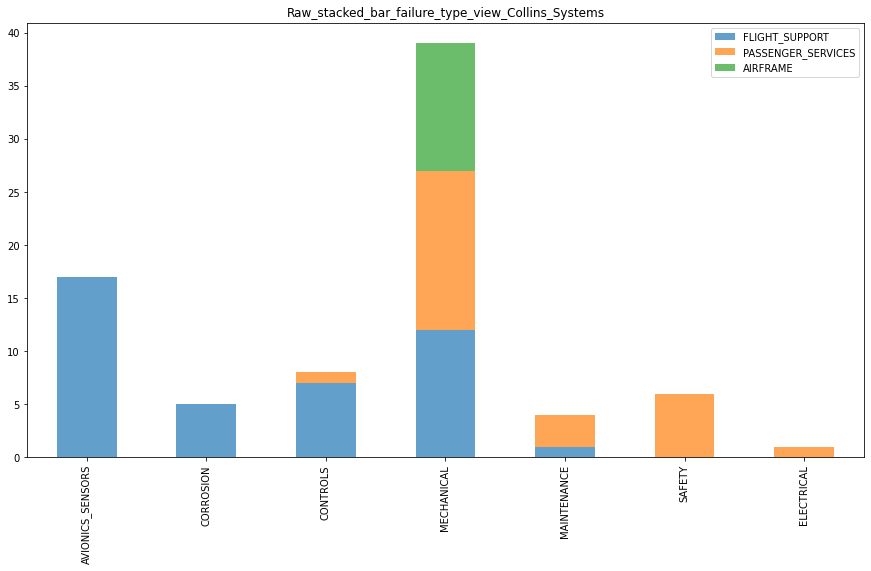

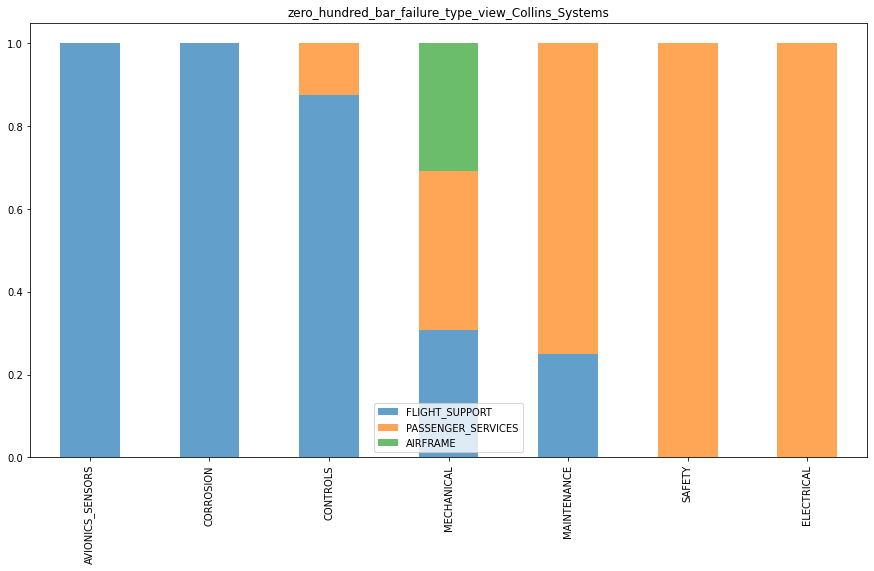

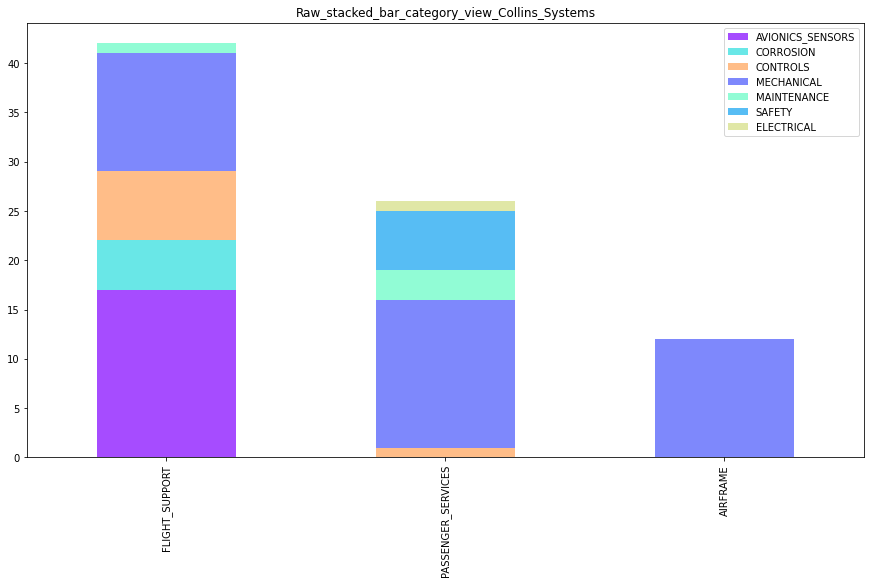

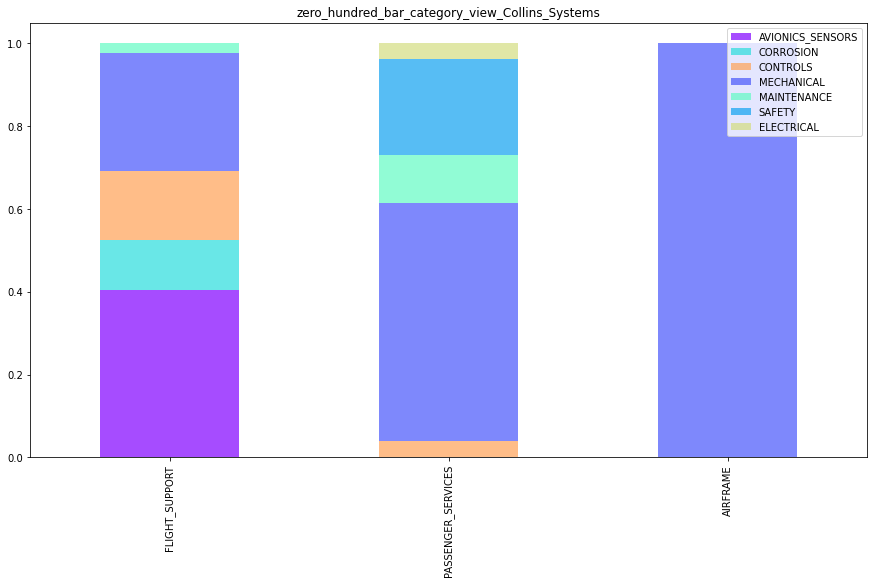

                    AVIONICS_SENSORS  CORROSION  ...  SAFETY  ELECTRICAL
FLIGHT_SUPPORT                  17.0        5.0  ...     NaN         NaN
PASSENGER_SERVICES               NaN        NaN  ...     6.0         1.0
AIRFRAME                         NaN        NaN  ...     NaN         NaN

[3 rows x 7 columns]


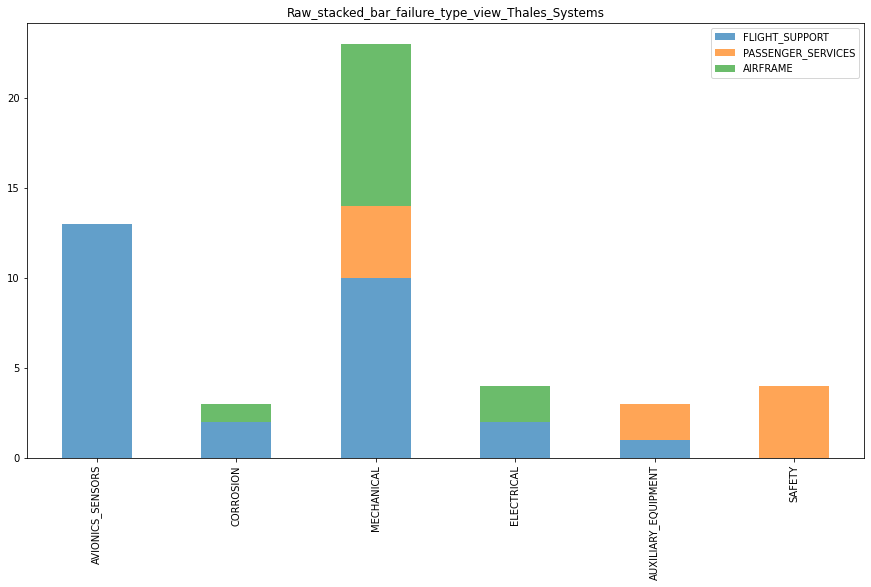

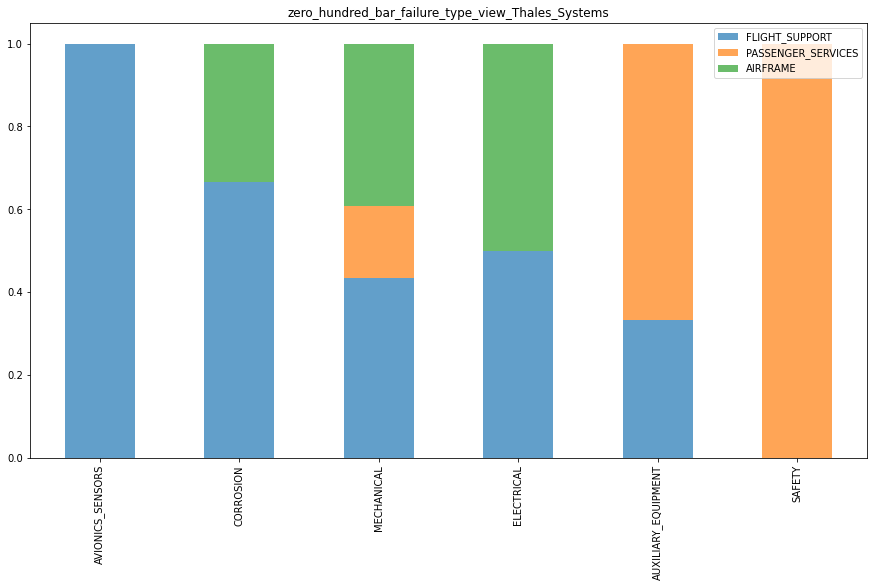

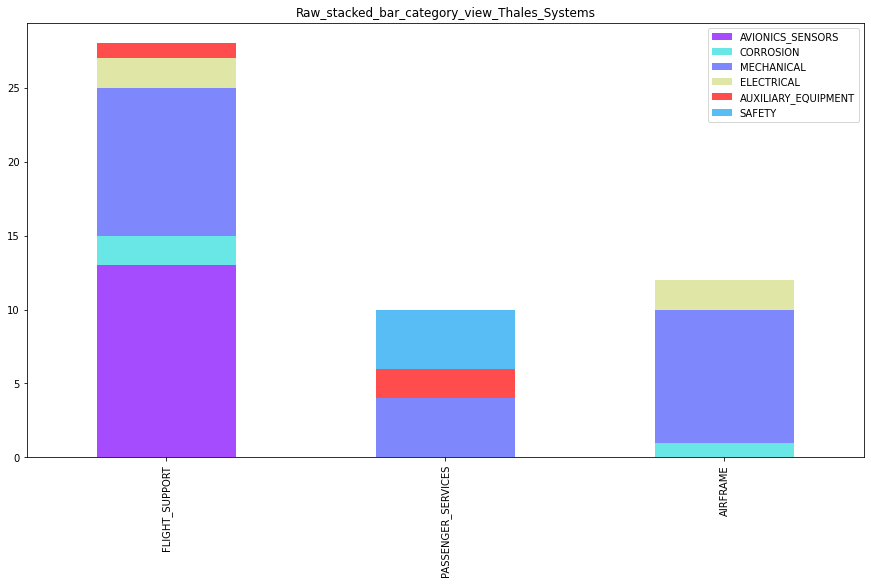

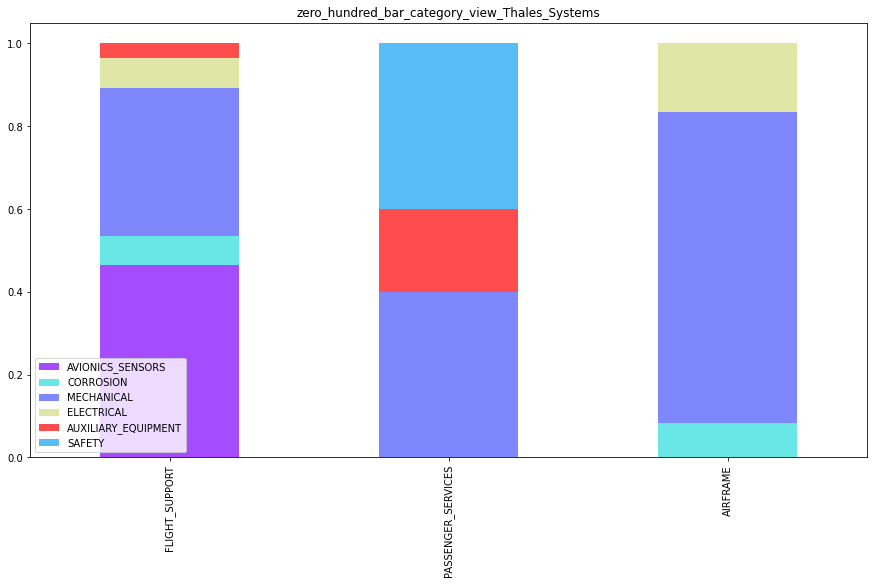

                    AVIONICS_SENSORS  CORROSION  ...  AUXILIARY_EQUIPMENT  SAFETY
FLIGHT_SUPPORT                  13.0        2.0  ...                  1.0     NaN
PASSENGER_SERVICES               NaN        NaN  ...                  2.0     4.0
AIRFRAME                         NaN        1.0  ...                  NaN     NaN

[3 rows x 6 columns]


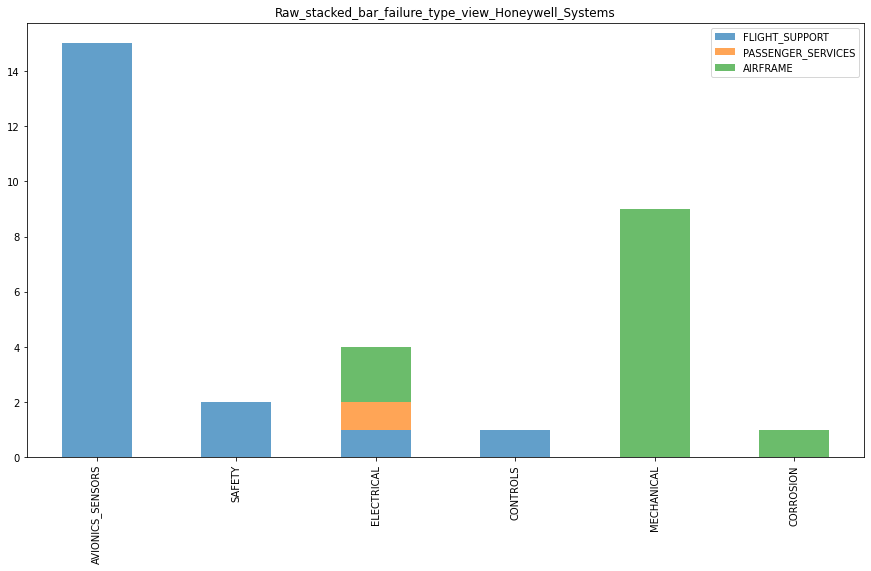

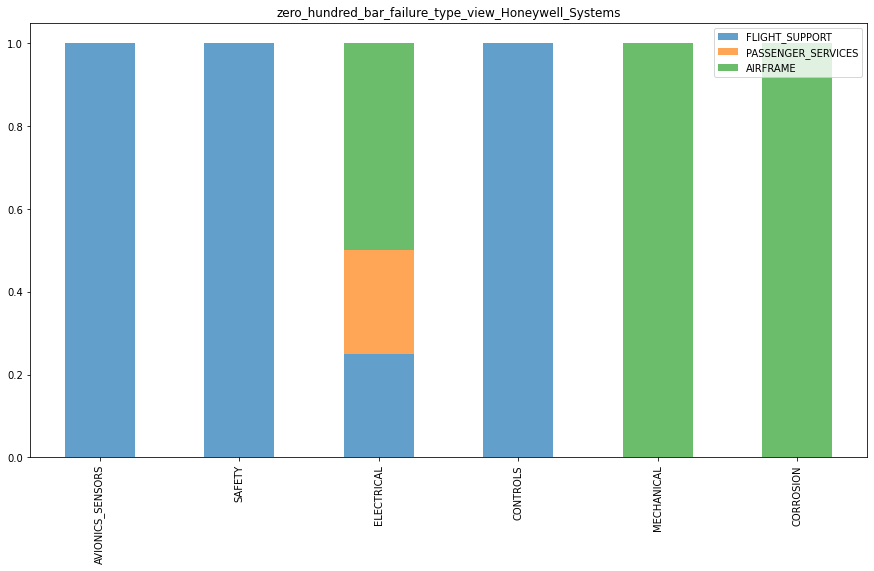

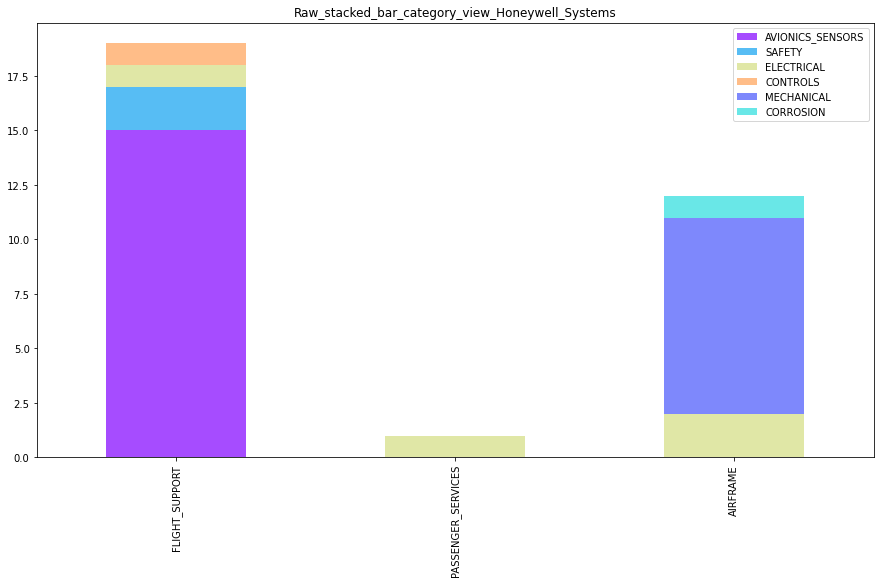

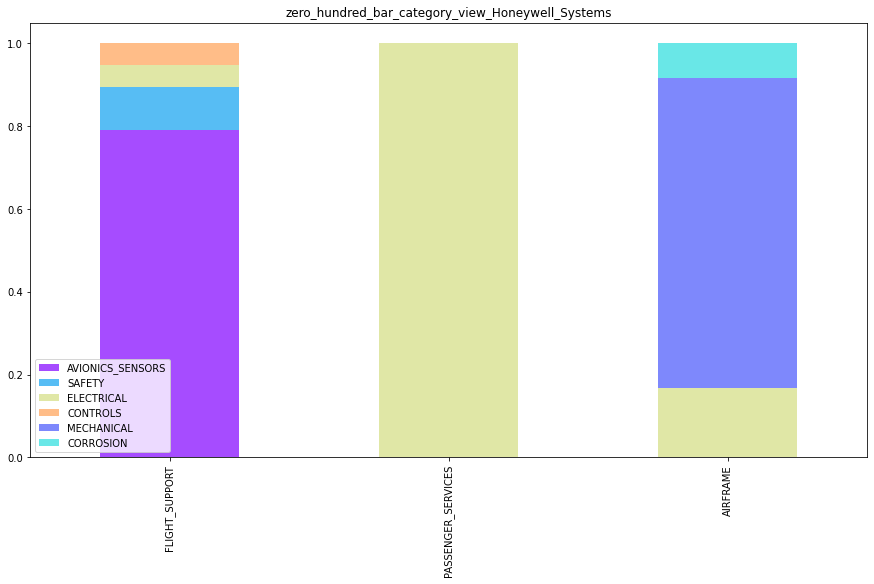

                    AVIONICS_SENSORS  SAFETY  ...  MECHANICAL  CORROSION
FLIGHT_SUPPORT                  15.0     2.0  ...         NaN        NaN
PASSENGER_SERVICES               NaN     NaN  ...         NaN        NaN
AIRFRAME                         NaN     NaN  ...         9.0        1.0

[3 rows x 6 columns]


,Collins,Thales,Honeywell
FLIGHT_SUPPORT,"{'AVIONICS_SENSORS': 15, 'SAFETY': 2, 'ELECTRI...","{'AVIONICS_SENSORS': 15, 'SAFETY': 2, 'ELECTRI...","{'AVIONICS_SENSORS': 15, 'SAFETY': 2, 'ELECTRI..."
PASSENGER_SERVICES,{'ELECTRICAL': 1},{'ELECTRICAL': 1},{'ELECTRICAL': 1}
AIRFRAME,"{'MECHANICAL': 9, 'CORROSION': 1, 'ELECTRICAL'...","{'MECHANICAL': 9, 'CORROSION': 1, 'ELECTRICAL'...","{'MECHANICAL': 9, 'CORROSION': 1, 'ELECTRICAL'..."


In [ ]:
big_dict = {}
companies = [df_c, df_t, df_h]

comp_dict = {0:"Collins", 1:"Thales", 2:"Honeywell"}

label = 'AIRFRAME_TYPES_label'
failure_label = 'FAILURE_CLASS'

elim_labels = ['nan', 'MISC', 'MISC1']

comp_big_dict = {}

for i, df_comp in enumerate(companies):  
    company = comp_dict[i]
    
    for typ in df_comp[label].unique():

        fil = df_comp[label] == typ
        df_tmp = df_comp[fil]
        fail_types = [t for t in list(df_tmp[failure_label].unique()) if str(t) not in elim_labels]
        type_count = {}
        for fail in fail_types:
            type_count[fail] = df_tmp[failure_label][df_tmp[failure_label] == fail].count()
        big_dict[typ] = type_count
        comp_big_dict[company] = big_dict
    
    plot_stackedbar_from_dict(big_dict, company, 'Systems')       
    
    
df_big = pd.DataFrame(comp_big_dict)
df_big

## Breaking Down Detailed Failure Modes across Suppliers
### Suppliers
* Collins
* Thales
* Honeywell
### Failure Mode Definitions:
* AVIONICS_SENSORS: Failures that occur internally to avionics systems and their sensors.  Does not include basic electrical service or mechanical fixturing failures associated with avionics or sensors.
* AUXILIARY_SYSTEMS: Failures that are not clearly mechanical or electrical that are associated with systems that cannot be considered Avionics but still have an Airworthinkess impact (examples: Air Conditioning, Searchlights, etc.)
* CORROSION: Failures that appear to be due primarily to corrosion
* CONTROLS: Failures that are associated with the control mechanisms (sensors, actuators, dynamic structures) across the airframe.  Doesn't include electrical service or fixturing failures.
* MECHANICAL: A very large source of failures, describes failures in fasteners, fixturing, materials, structural failures.  Can occur in multiple Airframe Types.
* MAINTENANCE: Problems without a clear geneis but Maintenance is required in the Airworthiness Directives.  This also includes Time in Service changes (reliability issues).
* SAFETY: Failures in any system where the root cause was either uncertain or crossed multiple boundaries and ultimately resulted in a safety event (fires, etc.) or risk.  aLSO includes unspecified failures to actual safety equipment (fire extinguishers, etc.)
* ELECTRICAL: Describes failures in electrical service, wiring, connectors, etc.

['AVIONICS_SENSORS', 'MECHANICAL', 'CORROSION', 'SAFETY', 'ELECTRICAL', 'AUXILIARY_EQUIPMENT', 'CONTROLS']
3 7


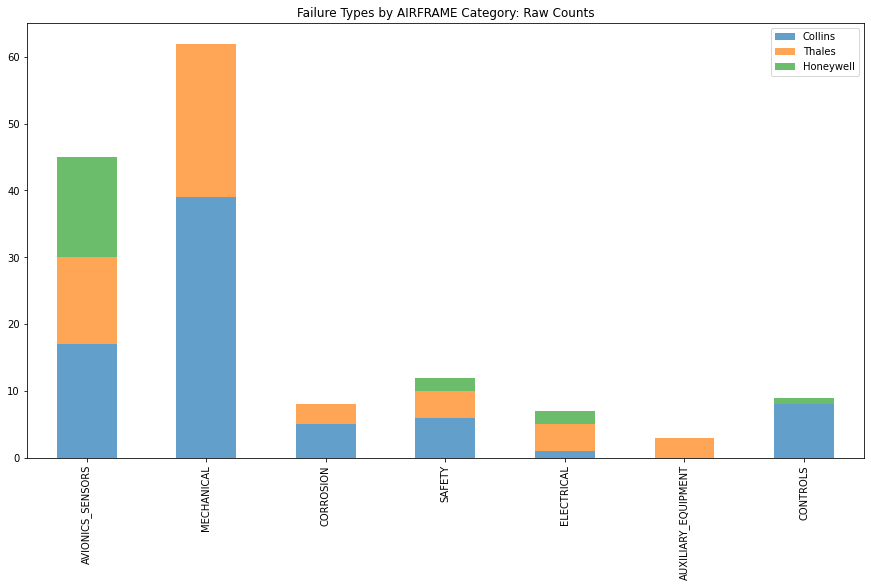

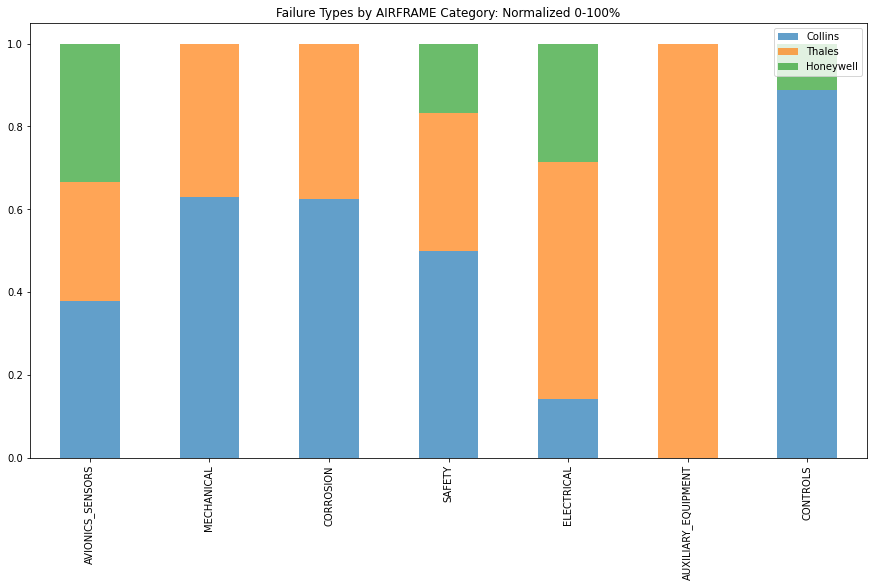

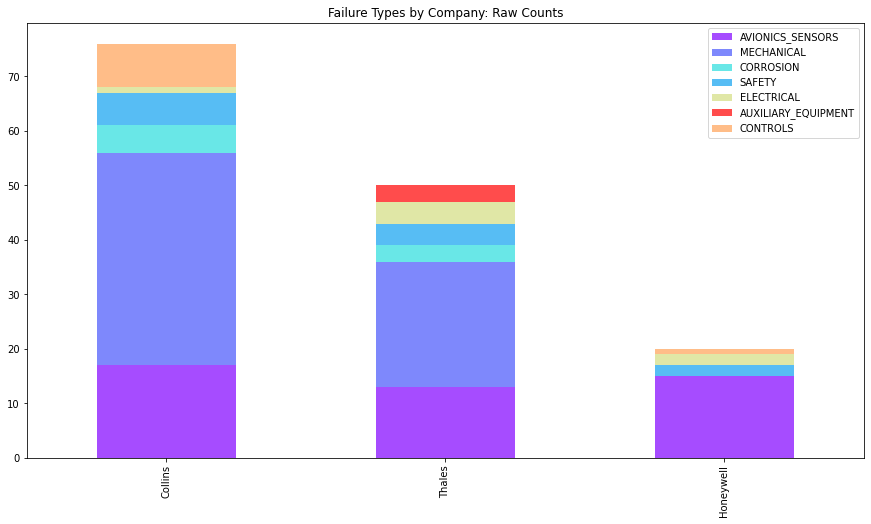

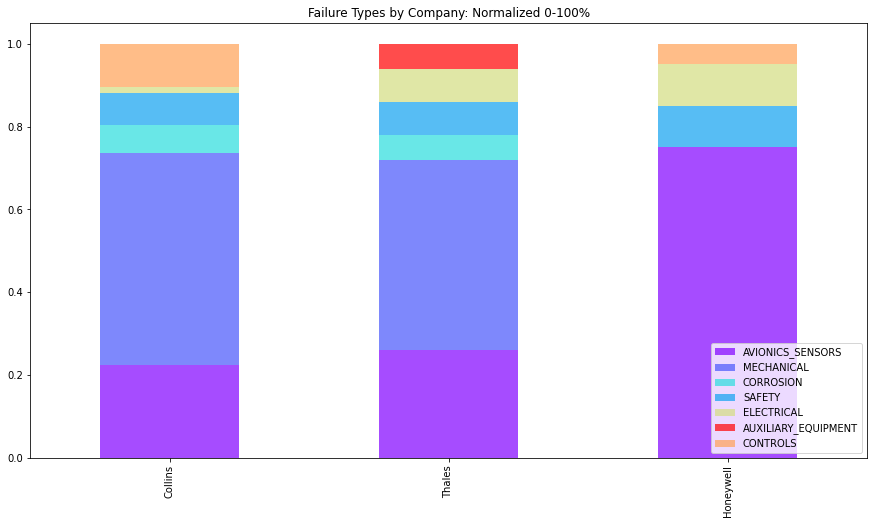

,Collins,Thales,Honeywell
AVIONICS_SENSORS,17,13,15
MECHANICAL,39,23,0
CORROSION,5,3,0
SAFETY,6,4,2
ELECTRICAL,1,4,2
AUXILIARY_EQUIPMENT,0,3,0
CONTROLS,8,0,1


In [ ]:

cols = list(df[failure_label].unique())[0:-1] # Gets rid of NaN category
print(cols)
collins_arr, thales_arr, honeywell_arr = [], [], []
print(len(companies), len(cols))
data = np.zeros((len(cols),len(companies)))
df_type = pd.DataFrame()

for i, df_comp in enumerate(companies):  
    company = comp_dict[i]

    for i2,c in enumerate(cols):
        df_tmp = (df_comp.loc[df_comp[failure_label] == c])
        #print(f"{company} {c}: {df_tmp[failure_label].count()}\n")
        #df_tmp.plot(kind="bar", stacked=True, figsize=(15,8))
        if i == 0:
            collins_arr.append(df_tmp[failure_label].count())
        elif i == 1:
            thales_arr.append(df_tmp[failure_label].count())
        elif i == 2:
            honeywell_arr.append(df_tmp[failure_label].count())
            
df_type['Collins'] = collins_arr
df_type['Thales'] = thales_arr
df_type['Honeywell'] = honeywell_arr
df_type.index = cols

df_norm = df_type.div(df_type.sum(axis=1), axis=0)
df_trans = df_type.T
df_trans_norm = df_trans.div(df_trans.sum(axis=1), axis=0)
            

#df.drop(cols[-1], inplace=True)
df_type.plot(kind="bar", stacked=True, figsize=(15,8), alpha=0.7, color=map(d2c.get,df_type.columns))
typ = 'Raw Counts'
plt.title(f"Failure Types by AIRFRAME Category: {typ}")
plt.savefig(f"Failure_Types_by_AIRFRAME_Category_{typ}.png")
plt.show()

df_norm.plot(kind="bar", stacked=True, figsize=(15,8), alpha=0.7, color=map(d2c.get,df_norm.columns))
typ = 'Normalized 0-100%'
plt.title(f"Failure Types by AIRFRAME Category: {typ}")
plt.savefig(f"Failure_Types_by_AIRFRAME_Category_{typ}.png")
plt.show()

df_trans.plot(kind="bar", stacked=True, figsize=(15,8), alpha=0.7, color=map(d2c.get,df_trans.columns))
typ = 'Raw Counts'
plt.title(f"Failure Types by Company: {typ}")
plt.savefig(f"Failure_Types_by_Company_{typ}.png")
plt.show()

df_trans_norm.plot(kind="bar", stacked=True, figsize=(15,8), alpha=0.7, color=map(d2c.get,df_trans_norm.columns))
typ = 'Normalized 0-100%'
plt.title(f"Failure Types by Company: {typ}")
plt.savefig(f"Failure_Types_by_Company_{typ}.png")
plt.show()
df_type


## Analysis of Breakdown of Failure Modes by Company
1. GENERAL NOTE:  In general, there just isn't enough "Airframe" data for these three companies and their subsidiaries in the EASA dataset.  It does appear to be most of the Airworthiness Directives have to do with ENGINE topics.  This makes this analysis less useful than it could be due to the statistics of small data sets.
2. Avionics/Sensors Failures  It appears that Honeywell has a larger share of the Avionics and Sensor failures.  These kinds of failures certainly dominate the Honeywell non-engine Airworthiness Directives.  Perhaps this reflects a different level of integration of Honeywell participation in the Commercial Aero (non-engine) market.  Thales and Collins have a large share of their failures classified as MECHANICAL and Honeywell has none. Per below, the top two "MECHANICAL" failing high-level Products are 1) Oxygen Systems (Collins) and 2) Air Brake Systems (Thales).
3. MECHANICAL Problems are split evenly across the three major AIRFRAME categories (Airframe, Passenger_Support, and Flight_Controls.  Clearly this is a universal source of problems.  Collins seems to have the largest share, but perhaps that's due to the products flagged for Airworthiness issues.

## Evaluate What Product Types "MECHANICAL" failure modes split into
### PRODUCT TYPE: is used to delineate the failures into the type of product (high level) the failure occurred in.
Below is a run of how the most common FAILURE_TYPE (MECHANICAL) breaks down across PRODUCT TYPE categories

['ATC TRANSPONDER', 'AUTOPILOT', 'ANGLE OF ATTACK SENSORS', 'PITOT PROBES', 'DOORS', 'SERVO CONTROL', 'FIRE SUPPRESSION', 'BURNER', 'ROLL SPOILERS', 'AIR BRAKE CONTROL', 'STABILIZER SUPPORT', 'CANOPY LOCK', 'GPS', 'TAIL ROTOR GEARBOX', 'PARACHUTE', 'LANDING FLAP', 'ELECTRICAL POWER SYSTEM', 'ATTITUDE HEADING SYSTEM', 'HOIST', 'PASSENGER SERVICE UNIT', 'SEARCHLIGHT', 'TAKEOFF_LANDING', 'COMMUNICATIONS', 'DOCUMENTATION', 'FUSELAGE', 'AC VAPOR CYCLE SYSTEM', 'ED FLIGHT CONTROL SYSTEM', 'EMERGENCY LOCATOR', 'AUXILIARY POWER UNIT', 'FLIGHT DISPLAY SYSTEM', 'EMERGENCY LIGHTING', 'TRAFFIC SURVEILLANCE SYSTEM', 'INTEGRATED NAVIGATION UNIT', 'AIR DATA PRESSURE TRANSDUCER', 'COMMUNICATIONS TRANSDUCER', 'FLIGHT MANAGEMENT SYSTEM', 'FMS 1M WORD DB', 'OXYGEN SYSTEMS', 'RAM  AIR TURBINE', 'COLLISION AVOIDANCE', 'ENGINE MOUNTS', 'TRIMMABLE HORIZ STABILIZER ACTUATORS', 'THRUST REVERSER', 'HSE CONTROL UNIT', 'SEATS', 'SEAT ENERGY ABSORBER', 'AIR INLET COWL', 'FIR SHUTOFF VALVES', 'NOSECONE PRESSURE SEN

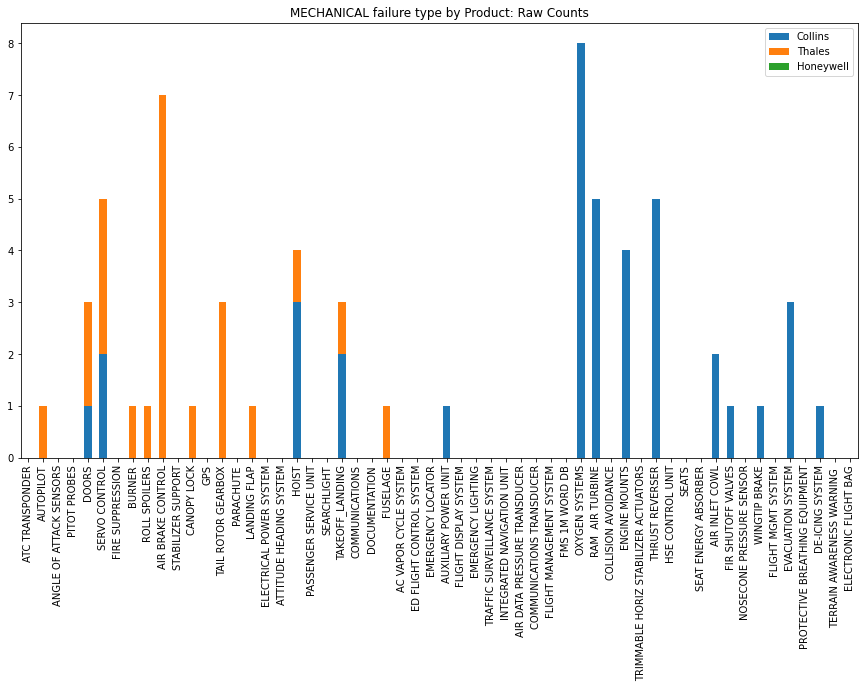

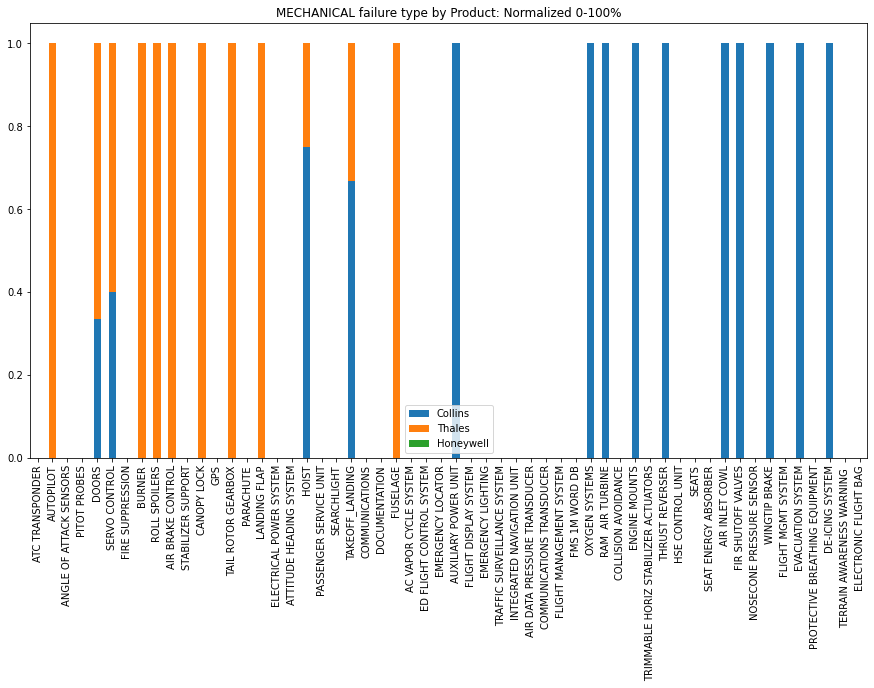

,Collins,Thales,Honeywell
OXYGEN SYSTEMS,8,0,0
THRUST REVERSER,5,0,0
RAM AIR TURBINE,5,0,0
ENGINE MOUNTS,4,0,0
HOIST,3,1,0
EVACUATION SYSTEM,3,0,0
TAKEOFF_LANDING,2,1,0
SERVO CONTROL,2,3,0
AIR INLET COWL,2,0,0
FIR SHUTOFF VALVES,1,0,0


In [ ]:
cols = list(df['PRODUCT TYPE'].unique()) 
print(cols)
collins_arr, thales_arr, honeywell_arr = [], [], []
print(len(companies), len(cols))
data = np.zeros((len(cols),len(companies)))
df_type = pd.DataFrame()

for i, df_comp in enumerate(companies):  
    company = comp_dict[i]
    
    df_tmp = (df_comp.loc[df_comp[failure_label] == 'MECHANICAL'])
    
    for i2,c in enumerate(cols):
        df_tmp2 = (df_tmp.loc[df_comp['PRODUCT TYPE'] == c])


        if i == 0:
            collins_arr.append(df_tmp2['PRODUCT TYPE'].count())
        elif i == 1:
            thales_arr.append(df_tmp2['PRODUCT TYPE'].count())
        elif i == 2:
            honeywell_arr.append(df_tmp2['PRODUCT TYPE'].count())
            
df_type['Collins'] = collins_arr
df_type['Thales'] = thales_arr
df_type['Honeywell'] = honeywell_arr
df_type.index = cols

df_norm = df_type.div(df_type.sum(axis=1), axis=0)
df_trans = df_type.T
df_trans_norm = df_trans.div(df_trans.sum(axis=1), axis=0)
            

#df.drop(cols[-1], inplace=True)
df_type.plot(kind="bar", stacked=True, figsize=(15,8))
typ = 'Raw Counts'
plt.title(f"MECHANICAL failure type by Product: {typ}")
plt.savefig(f"MECHANICAL_failure_type_by_Product_{typ}.png")
plt.show()

df_norm.plot(kind="bar", stacked=True, figsize=(15,8))
typ = 'Normalized 0-100%'
plt.title(f"MECHANICAL failure type by Product: {typ}")
plt.savefig(f"MECHANICAL_failure_type_by_Product_{typ}.png")
plt.show()


df_type.sort_values(by='Collins', ascending=False)
